<a href="https://colab.research.google.com/github/harisdesai/ML/blob/main/K_value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib.colors import ListedColormap

In [ ]:
data = pd.read_csv("iris.csv")

X = data.drop("species", axis=1)
y = data["species"]

le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.3, random_state=42
)

In [ ]:
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

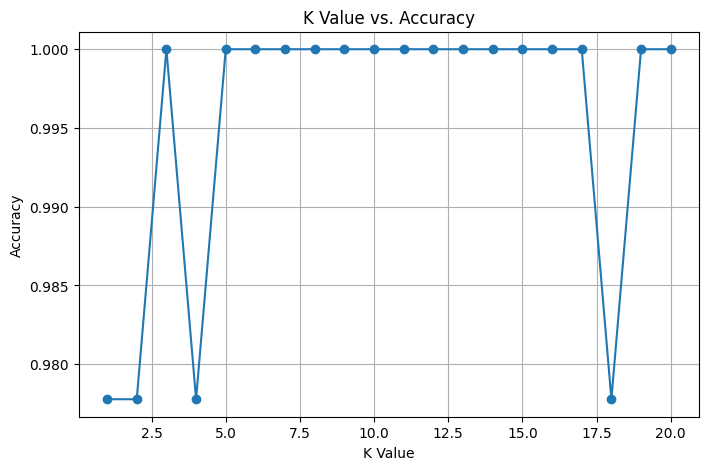

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker="o")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("K Value vs. Accuracy")
plt.grid(True)
plt.show()

In [ ]:
X_two_features = X_scaled[:, :2]
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    X_two_features, y_encoded, test_size=0.3, random_state=42
)

best_k = k_values[np.argmax(accuracies)]
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_2, y_train_2)

KNeighborsClassifier(n_neighbors=3)

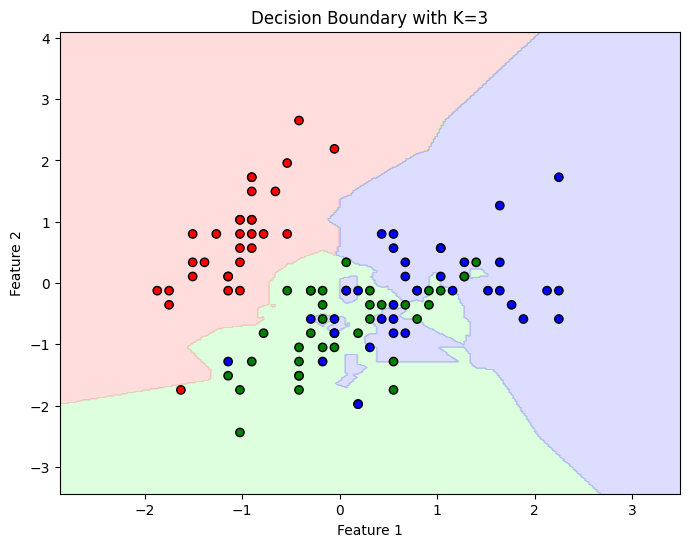

In [ ]:
x_min, x_max = X_two_features[:, 0].min() - 1, X_two_features[:, 0].max() + 1
y_min, y_max = X_two_features[:, 1].min() - 1, X_two_features[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])
cmap_bold = ["red", "green", "blue"]

plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap_light)
plt.scatter(X_train_2[:, 0], X_train_2[:, 1], c=y_train_2, cmap=ListedColormap(cmap_bold), edgecolor="k")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"Decision Boundary with K={best_k}")
plt.show()

In [ ]:
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train, y_train)
y_pred_final = final_knn.predict(X_test)

final_accuracy = accuracy_score(y_test, y_pred_final)
cm = confusion_matrix(y_test, y_pred_final)

print(f"Best K: {best_k}")
print(f"Final Accuracy: {final_accuracy:.2f}")

Best K: 3
Final Accuracy: 1.00


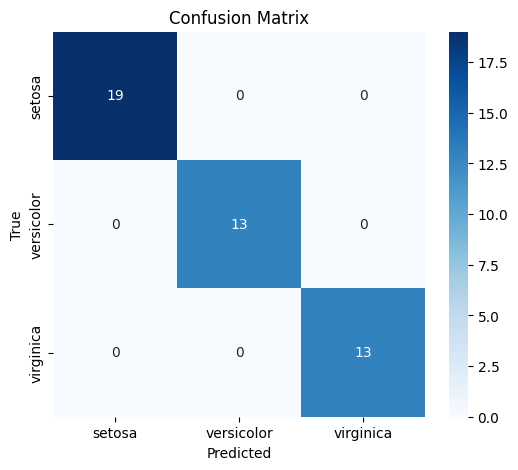

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()